In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from collections import Counter

In [5]:
# Importing the listing dataset
listingsDF = pd.read_csv('E:\IMARTICUS\CAPSTONE PROJECT\CAPSTONE PROJECT 2\listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
print("Data type : ", type(listingsDF))
print("Data dims : ", listingsDF.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3818, 92)


# Data Cleaning

In [7]:
# the following variables were picked for further analysis and dropped variables like date_scraped etc.
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [8]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\3380900051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\3380900051.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


In [9]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.

Number of room types : 3

Entire home/apt    1805
Private room        947
Shared room          91
Name: room_type, dtype: int64


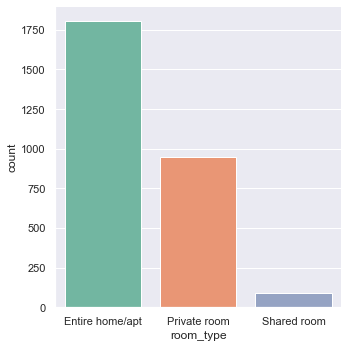

In [10]:
# Number of room types
print("Number of room types :", len(listingDF["room_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["room_type"].value_counts())
sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")

Analyzing the listings based on the property type.

Number of property types : 15

House              1403
Apartment          1194
Townhouse            78
Condominium          68
Bed & Breakfast      26
Loft                 22
Cabin                17
Other                13
Camper/RV             8
Boat                  5
Tent                  4
Bungalow              2
Dorm                  1
Chalet                1
Treehouse             1
Name: property_type, dtype: int64


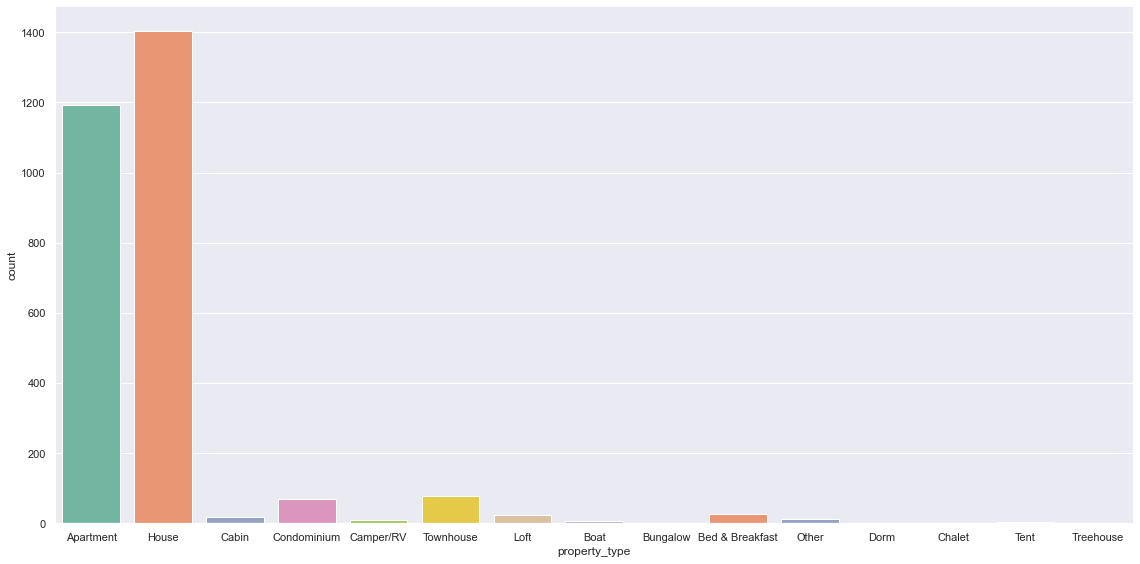

In [12]:
# Number of property types
print("Number of property types :", len(listingDF["property_type"].unique()))
print()

# Number of listings of each room type
print(listingDF["property_type"].value_counts())
sb.catplot(x = "property_type", data = listingDF, kind = "count", palette="Set2", height = 8, aspect = 2)

From the above graph, we can see that there are a lot more listings of apartment and full houses than any other property type in seattle. Together with the earlier discovery that hosts prefer to list their full property than just a room or shared room, it can be inferred that most listings in Seattle are entire apartments or entire houses. Now lets analyze if these listing types have anything to do with the prices of the listings.

Analyzing the prices for the different room and property types.

In [13]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = listingDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


<AxesSubplot:xlabel='room_type', ylabel='property_type'>

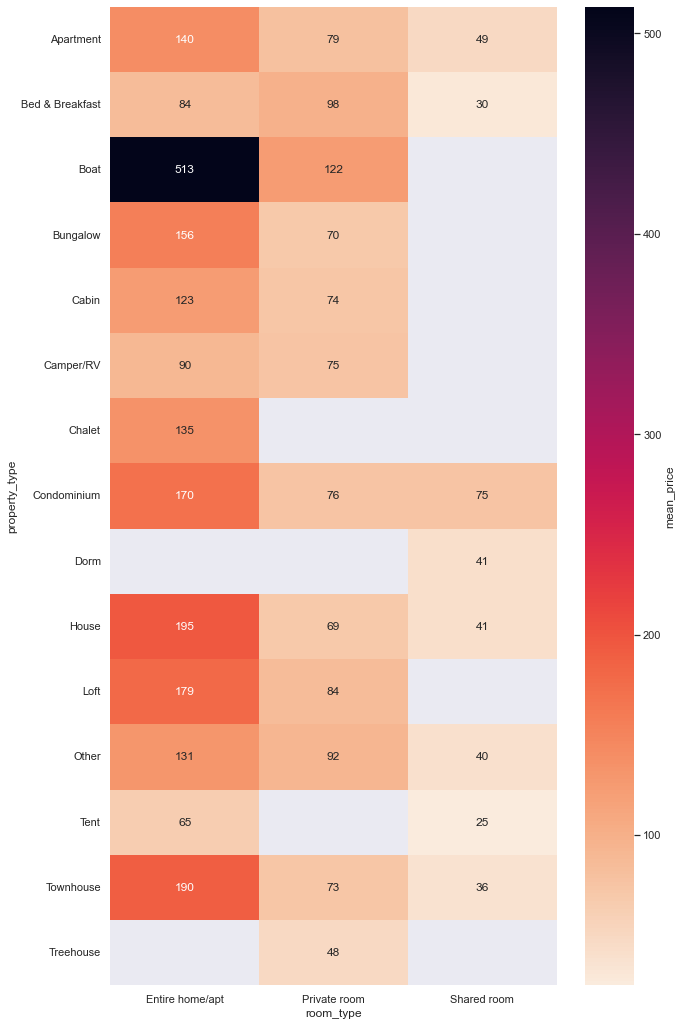

In [18]:
# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sb.heatmap(listingDF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour hence cheapest. Private rooms have a slightly darker colour so they are in the middle, and entire houses are the darkest thus the most expensive.

It is also important to note that the highest number of listings which was house and apartments actually have very similar prices for each of the room_type category.

All of this tells us that the room_type and property_type both play a very important role in the final price of the listing.

Anaylzing the listings based on the number of bedrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

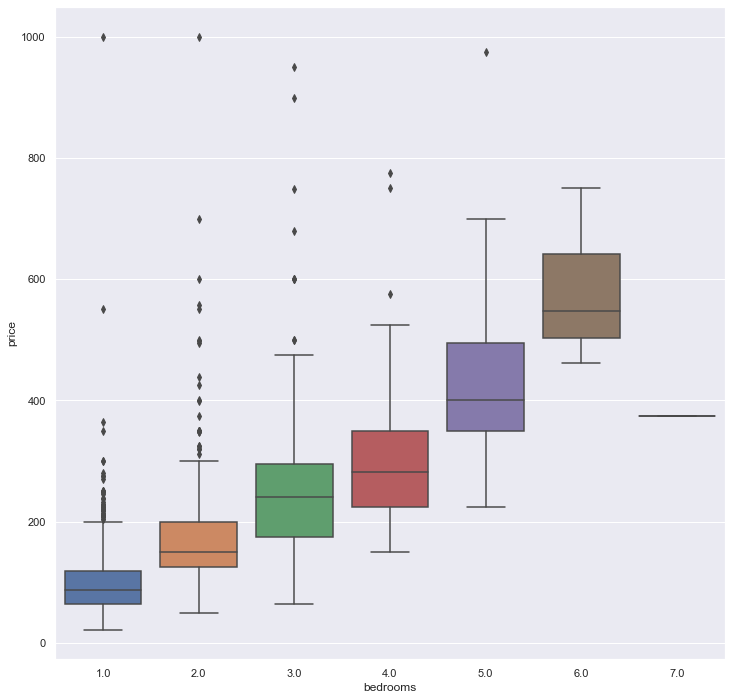

In [19]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=listingDF[['bedrooms', 'price']])

From the box plots above, it can be seen that listings have higher prices as the number of bedrooms increase.

From all the analysis above, we can say a few things:

Type of room for the listing has a great influence in the price. Most hosts list their entire property. Moreover, entire property lisitings cost the most.

The type of property also influences price. Although the highest price is fetched by boat houses, there are very few of them. The most common properties are houses and apartments since these are the 2 types of properties that most hosts list and they do fetch a high price provided the entire property is listed as mentioned in (1).

The number of bedrooms in the listing also has a general trend with the price of the listing. The more rooms available, the higher the price of the listing.

In [ ]:
# Machine Learning

Importing Essential Libraries
Other than the essential libraries that were learnt and used in the labs such as Numpy, Pandas, Seaborn and the various sklearn functions, other libraries that were used in this portion of the project includes the libraries needed for regression modelling as well as for model analysis

In [23]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

# Importing Dataset
The dataset, which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

Room Type
Property Type
Number of Bedrooms
Amenities
Number of Reviews
As such, we single out these variables (together with price) to form a new dataframe.

In [24]:
listingDF =  pd.read_csv('E:\IMARTICUS\CAPSTONE PROJECT\CAPSTONE PROJECT 2\listings.csv')

In [25]:
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


# Data-Cleaning
Data Cleaning is done to remove the irrelevant/insignificant parts of the data, modify the data for easy manipulation and correcting them so as to prepare them for modelling.

Amenities
Displays the different types of amenities available for each listing
To clean the data in this variable:

Checking and listing down all the different amenities that were offered
Separating the different amenities and creating a dedicated column for each amenity
Removing amenities which have NULL values for all listings

In [26]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [27]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\631897346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\631897346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\63

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\631897346.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\631897346.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
C:\Users\CHANDURU\AppData\Local\Temp\ipyke

In [28]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\937827799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.drop('amenities', axis=1, inplace=True)


In [29]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

# Property Type
Displays the property type of a listing
To clean the data in this variable:

Grouping property types whose low counts might be insignificant and not provide us with enough information
Thus, grouping property types that have counts that are < 30

In [30]:
newListingsDF.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,$85.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,$150.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,$975.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,Apartment,0.0,0,$100.00,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,Entire home/apt,House,3.0,38,$450.00,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [31]:
# Checking to see the total number of each type of property 
newListingsDF.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [32]:
# Grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: property_type, dtype: int64

# Price
Displays the price/cost of a listing
To clean the data in this variable:

Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer

In [33]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   int64  
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\1923169659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.price = newListingsDF.price.str[1:-3]
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\1923169659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.price = newListingsDF.price.str.replace(",", "")
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\1923169659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Ensuring that there are no NULL entries in the data

In [34]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

# Regression Models
Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

Predictor Variables: Room_type, Property_type, Bedrooms, Number_of_Reviews, Amenities
Response Variable: Price
The following regression models will be carried out:

Linear Regression
Ridge Regression
Lasso Regression
Random Forest Regression
XGBoost
Data Preparation
The following will be done to the data to ensure its fit into the different regression models:

Encoding the categorical variables so that it can be fit into the regression models
Separating the data into predictor and response variables
Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [36]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

In [37]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [38]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model 1: Linear Regression
Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

Here, we have trained the model to follow the following formula:

Regression Problem : Price = 
 
 (Predictor Variables) + 

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable).

In [39]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [40]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [127.7873153]

                         Predictors  Coefficients
0                          bedrooms  5.204365e+01
1                         breakfast  4.877794e-01
2                                tv  3.228438e+00
3                       white_goods -5.421564e-01
4                          elevator  1.034983e+01
5                               gym  1.577175e+00
6             hot_tub_sauna_or_pool  1.629598e+00
7                          internet -7.091923e-01
8                      pets_allowed -3.765016e+00
9                            secure  5.325848e-01
10                       accessible  9.137200e-02
11                number_of_reviews -3.596600e+00
12        room_type_Entire_home_apt -3.888264e+14
13           room_type_Private_room -3.790220e+14
14            room_type_Shared_room -1.420399e+14
15          property_type_Apartment -6.682020e+14
16  property_type_Bed_and_Breakfast -1.316518e+14
17        property_type_Condominium -2.049854e+14
18 

Note that: A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [41]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

InvalidIndexError: (slice(None, None, None), None)

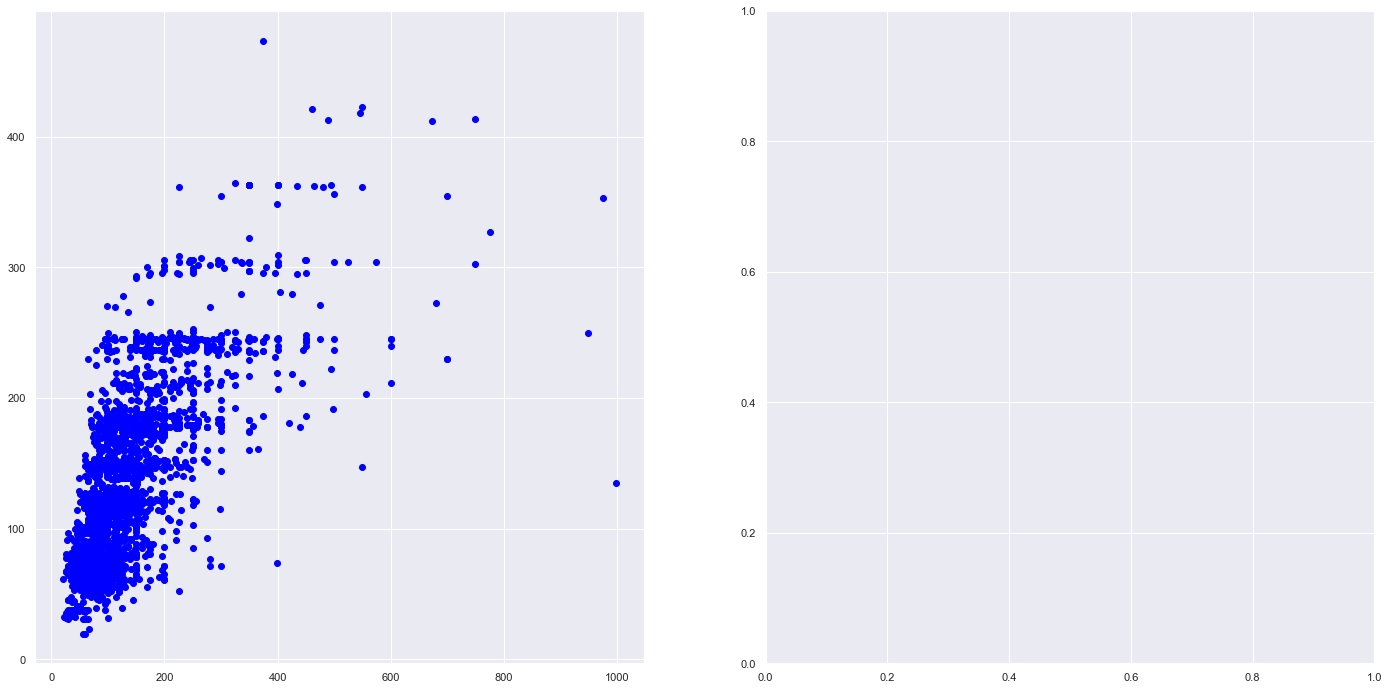

In [43]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 2: Ridge Regression
Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different 
 values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.

In [44]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"])

In [45]:
#initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

The highest R2 value:  0.5202918061973882
The value of lambda that minimises:  1


C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,52.043651,0.431938,3.176916,-0.690945,10.319500,1.679251,1.597248,-0.791935,-3.573924,...,-3.888264e+14,-3.790220e+14,-1.420399e+14,-6.682020e+14,-1.316518e+14,-2.049854e+14,-6.690752e+14,-1.368307e+14,-2.049854e+14,-2.325758e+14
1,estimate0,52.043651,0.431938,3.176916,-0.690945,10.319500,1.679251,1.597248,-0.791935,-3.573924,...,-3.888264e+14,-3.790220e+14,-1.420399e+14,-6.682020e+14,-1.316518e+14,-2.049854e+14,-6.690752e+14,-1.368307e+14,-2.049854e+14,-2.325758e+14
2,estimate1,51.472217,-0.541457,2.826952,-0.474266,9.838650,1.780935,1.716558,-0.935430,-3.246001,...,1.299042e+01,-9.843275e+00,-9.294559e+00,-2.983411e+00,3.063513e+00,1.511955e+00,-7.646169e-02,3.267293e+00,3.552488e+00,6.714366e-01
3,estimate2,51.451336,-0.542380,2.829960,-0.471568,9.830617,1.783607,1.717512,-0.935485,-3.245281,...,1.299149e+01,-9.845360e+00,-9.291934e+00,-2.985413e+00,3.062649e+00,1.512074e+00,-7.328562e-02,3.265068e+00,3.550292e+00,6.716796e-01
4,estimate3,51.430476,-0.543303,2.832963,-0.468875,9.822598,1.786271,1.718465,-0.935538,-3.244562,...,1.299256e+01,-9.847440e+00,-9.289312e+00,-2.987410e+00,3.061785e+00,1.512192e+00,-7.011458e-02,3.262845e+00,3.548098e+00,6.719217e-01


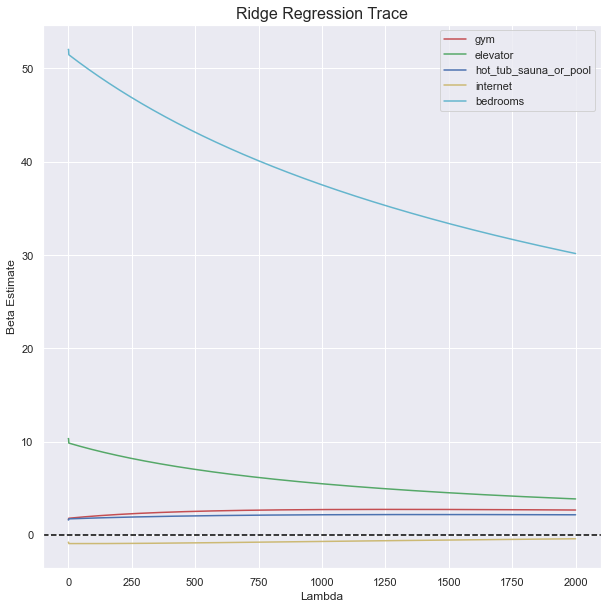

In [46]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

From this graph, we can see that the most important predictor among the 5 is bedrooms. For Ridge Regression, the beta estimate of each predictor will converge to zero (but will never reach zero) as lambda increases, the faster it converges to zero, the less important the predictor is. For this case, the most important predictor is bedrooms. The reason why the beta estimate does not reach zero is because Ridge Regression does not drop any predictors, unlike Lasso Regression, which we will observe later on.

InvalidIndexError: (slice(None, None, None), None)

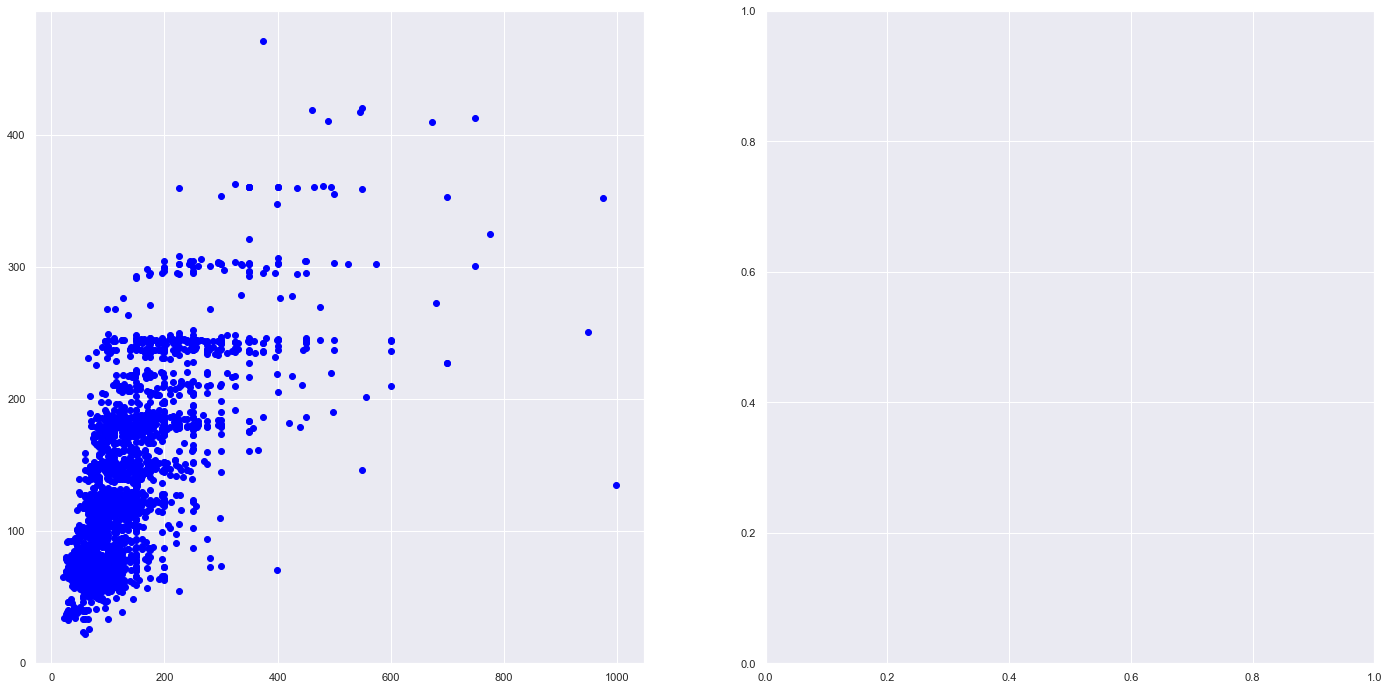

In [47]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Ridge Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 3: Lasso Regression
Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasson Regression also requires a 
 value to be iterated to find the best fit.

In [48]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

The highest R2 value:  0.5202916253641052


C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,...,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Apartment,property_type_Bed_and_Breakfast,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,estimate,51.012191,-0.000000,2.089293,-0.000000,8.753897,1.635111,1.173706,-0.000000,-2.208840,...,22.424112,-0.0,-4.799503,-1.392545,1.964646,1.085341,-0.0,2.257202,2.491747,0.000000
1,estimate0.01,51.487533,-0.530231,2.815975,-0.466789,9.830775,1.774391,1.711460,-0.925859,-3.236734,...,23.079199,-0.0,-5.601221,-2.887963,3.068231,1.531166,-0.0,3.275292,3.568720,0.689170
2,estimate0.03,51.476369,-0.509632,2.800051,-0.446431,9.798925,1.766662,1.703176,-0.906830,-3.216758,...,23.067404,-0.0,-5.585336,-2.860145,3.044598,1.521030,-0.0,3.254259,3.547989,0.669756
3,estimate0.049999999999999996,51.465123,-0.488526,2.784301,-0.425835,9.771300,1.760948,1.693776,-0.887802,-3.196740,...,23.056053,-0.0,-5.569579,-2.831894,3.020794,1.511208,-0.0,3.233611,3.527222,0.650328
4,estimate0.06999999999999999,51.453739,-0.466764,2.768776,-0.404921,9.749132,1.757775,1.682950,-0.868779,-3.176657,...,23.045298,-0.0,-5.553984,-2.803102,2.996769,1.501789,-0.0,3.213455,3.506407,0.630882


C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\1407236001.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-1, 100, 1))


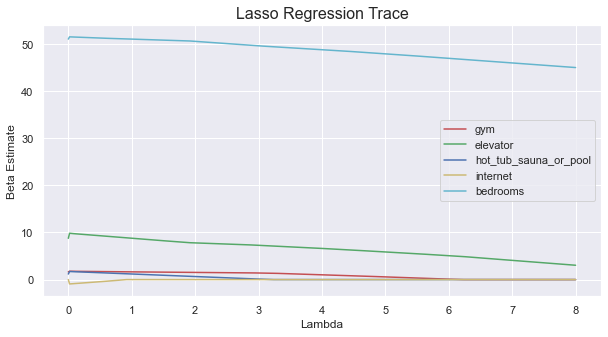

In [49]:
#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

From this graph, we can see that the most important predictor among the 5 is also bedrooms. For Lasso Regression, the faster the beta estimate of the predictor reaches zero (the predictor has been dropped) as lambda increases, the less important the predictor is. As we can see from the graph, bedrooms does not even hit zero after when has reached its highest value of 8, compared to the beta estimate of hot_tub_sauna_or_pool which reached zero a lot faster than bedrooms.

InvalidIndexError: (slice(None, None, None), None)

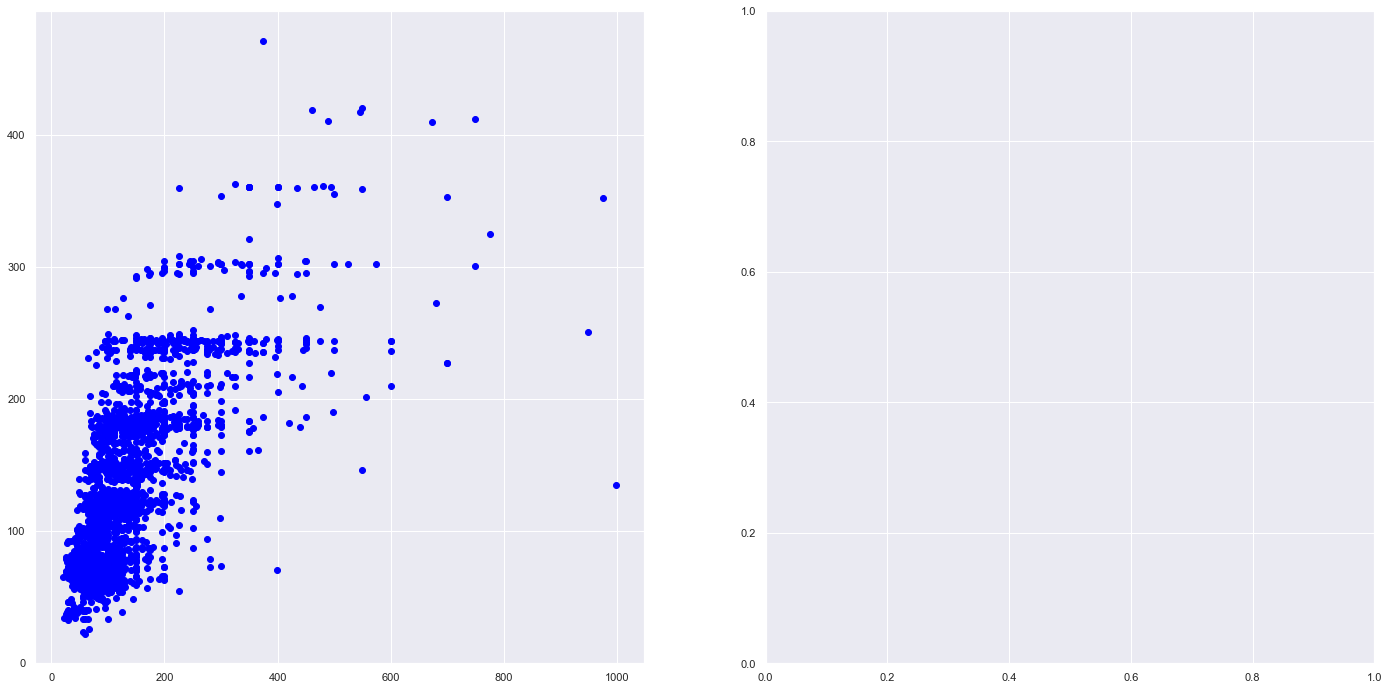

In [50]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 4: Random Forest Regression
Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees.

Here, we use the RandomForestRegressor to help predict the price.

In [51]:
# Tuning of Parameters

# random_grid = {'n_estimators': [2000],
#                'max_features': [2,5],
#                'max_depth': [40,70],
#                'min_samples_split': [40,50],
#                'max_leaf_nodes':[50,70],
#                'max_features': [2,5]}
# rf_tune = RandomForestRegressor()
# rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

# rf_random.fit(X_train,y_train)

# print(rf_random.best_estimator_)

To optimize the parameters used in the Random Forest Regression modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10, max_features=5, max_leaf_nodes=30, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

C:\Users\CHANDURU\AppData\Local\Temp\ipykernel_26848\3469011015.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,


In [53]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
property_type_Bed_and_Breakfast,0.001831
property_type_Townhouse,0.002847
property_type_Loft,0.003059
secure,0.004005
accessible,0.004173
internet,0.004639
property_type_Condominium,0.005089
breakfast,0.005295
pets_allowed,0.005350
white_goods,0.008383


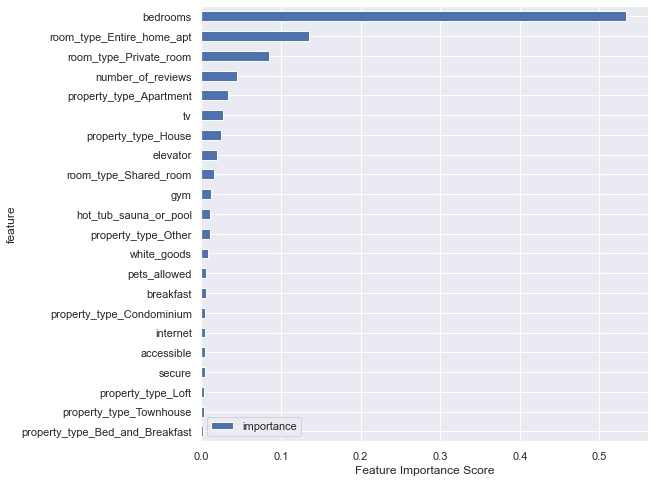

In [54]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a taller bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price.

InvalidIndexError: (slice(None, None, None), None)

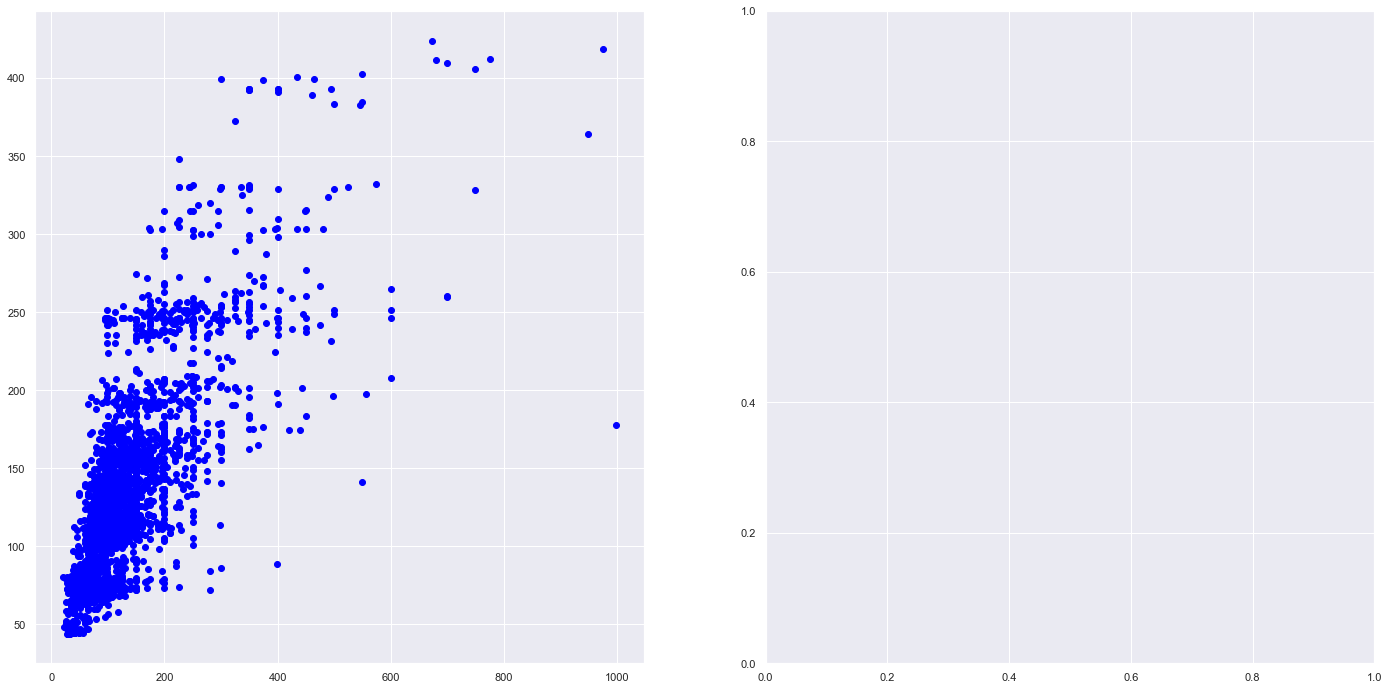

In [55]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

# Model 5 : XGBoost
XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification.

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [56]:
#Tuning the Parameters

# parameters_for_testing = {
#     'colsample_bytree':[0.3,0.5],
#     'learning_rate':[0.1,0.5],
#     'alpha': [10,12],
#     'max_depth':[3,5],
#     'n_estimators':[2000],  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#      gamma=0, colsample_bytree=0.8)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(X_train,y_train)

# print(gsearch1.best_estimator_)

To optimize the parameters used in the XGBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3, gamma=0, importance_type='gain', learning_rate=0.1, max_delta_step=0, max_depth=3, min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

In [57]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

[02:20:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


ImportError: You must install graphviz to plot tree

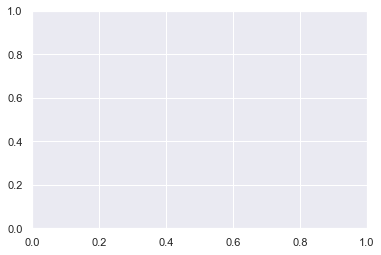

In [58]:
# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [59]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
property_type_Townhouse,0.005221
property_type_Bed_and_Breakfast,0.006196
internet,0.007657
property_type_Loft,0.008277
breakfast,0.008364
accessible,0.010984
secure,0.012193
white_goods,0.015285
property_type_Condominium,0.018535
gym,0.021027


Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the table above, the predictor variable that is associated with a higher number means that the variable has a higher importance in the XGBoost Regression Model in predicting price.

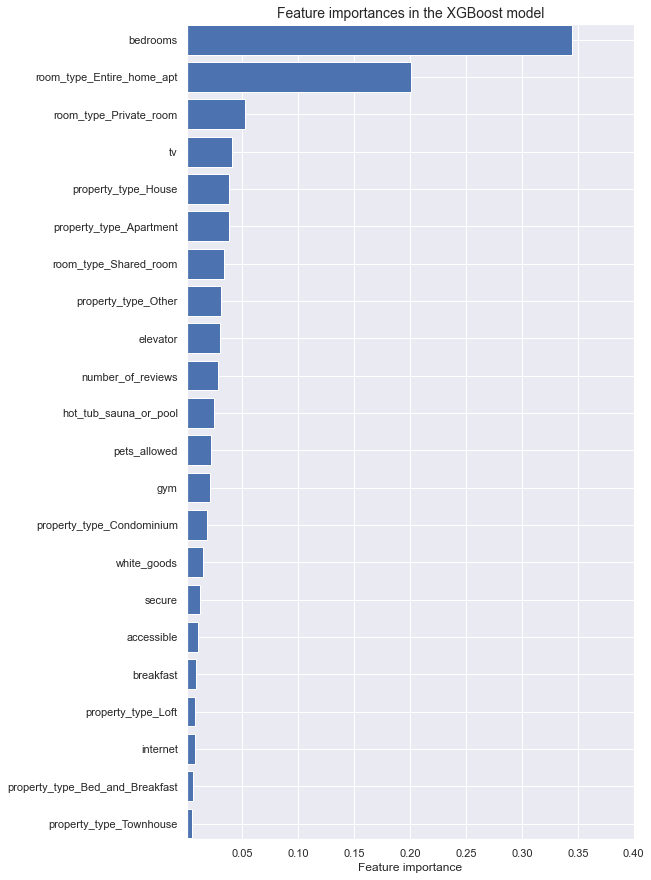

In [60]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

InvalidIndexError: (slice(None, None, None), None)

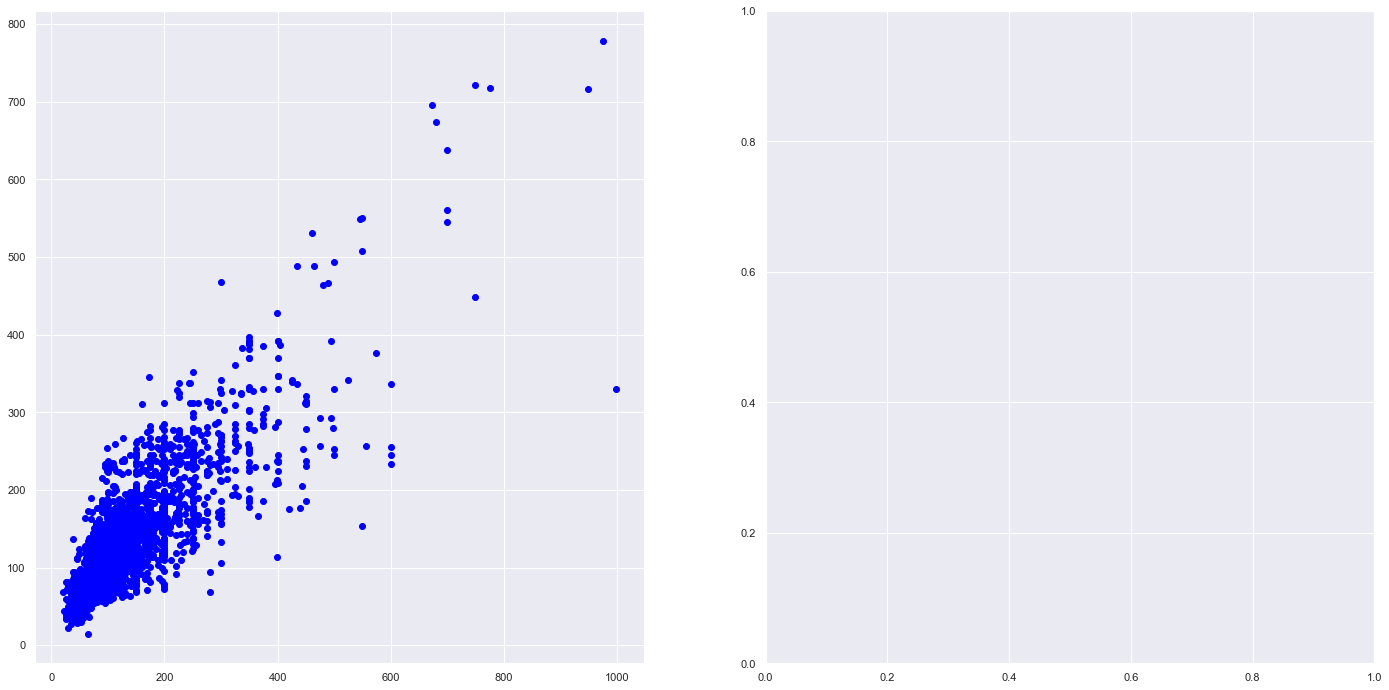

In [61]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Note that: Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted

In [62]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))


Goodness Fit on the Models (K-Fold Cross Validation):



NameError: name 'results_kfold_LR' is not defined

Observation

An interesting observation was that the MSE and R^2 values of the Linear Regression, Ridge Regression and Lasso Regression are very close to each other, this is most probably due to the similarities in the 3 models, as the Ridge and Lasso Regression model are supposed to be an upgraded version of Linear Regression.

# The Most Important Features of a Property Listing
From the evaluation of models, we can see that Random Forest Regression is the best (among all the others) at predicting price. With this information, we do further analysis to find out which feature is the most important.

We first test out its prediction on a specific instance. Then, using a library called TreeInterpreter, we decompose the Random Forest prediction into a sum of contributions from each feature:

(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.)

This will show us how each individual feature contributed in its prediction based on individual results. A positive result would mean that the feature has a positive impact on the prediction while a negative result shows a negative impact.

If the prediction of price is fairly accurate (comparing to its true value), then its contributions of individual features would also be deemed fairly reliable.

In [63]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)

ModuleNotFoundError: No module named 'treeinterpreter'

In [64]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

NameError: name 'instance' is not defined

In this case as seen above, the predicted value of instance 1235 is a very decently good prediction of its true value (150.86 vs 150). As such, if we look at the feature contributions, having amenities such as a hot tub/sauna/pool, gym or elevator is important in influencing price.

To explain why 'bedrooms' has such a negative contribution (even though from previous analysis, it has shown that it is a great impacter), it is because for this particular instance, the bedroom is valued at 0. As such, it can be said that while bedroom is at a negative contribution value, it is still one of the most important feature of a property listing.

# Conclusion

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.

# Answering the Problem
From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

Entire properties listed instead of just a single room fetch the highest prices.
Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
The reviews a listing gets (quality or quantity) does not have much of an impact in its price.